<a href="https://colab.research.google.com/github/jnkharel2024/projects/blob/main/Copy_of_Customer_Behaviour_Analysis_On_Transaction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Store Transaction Data.csv to Store Transaction Data.csv


In [ ]:
df = pd.read_csv('Store Transaction Data.csv')

In [ ]:
df.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
MONTH,0
STORECODE,0
QTY,0
VALUE,0
GRP,0
SGRP,0
SSGRP,0
CMP,0
MBRD,0
BRD,0


In [ ]:
df.describe()


,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Print the column names to check for any discrepancies
print(df.columns)


Index(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP', 'CMP',
       'MBRD', 'BRD'],
      dtype='object')


In [ ]:
df['TOTAL_VALUE'] = df['QTY'] * df['VALUE']

In [ ]:
data = pd.read_csv('Store Transaction Data.csv')  # Example of loading data
data['TOTAL_VALUE'] = data['QTY'] * data['VALUE']

In [ ]:
def process_data():
    data = pd.read_csv('Store Transaction Data.csv')
    data['TOTAL_VALUE'] = data['QTY'] * data['VALUE']
    return data

df = process_data()

In [ ]:
data.describe()

,QTY,VALUE,TOTAL_VALUE
count,14260.000000,14260.000000,1.426000e+04
mean,16.354488,294.455330,1.458708e+04
std,34.365583,760.129558,1.066462e+05
min,0.000000,0.000000,0.000000e+00
25%,1.000000,10.000000,1.700000e+01
50%,4.000000,99.000000,4.770000e+02
75%,16.000000,283.000000,4.181000e+03
max,641.000000,24185.000000,7.303870e+06


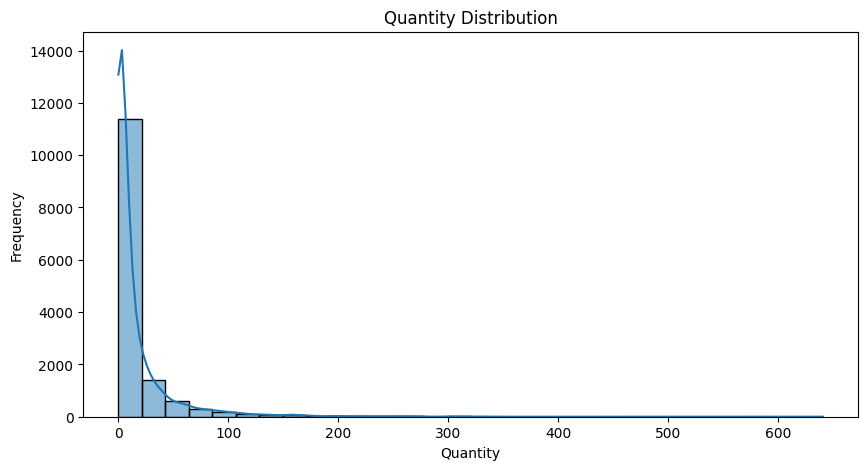

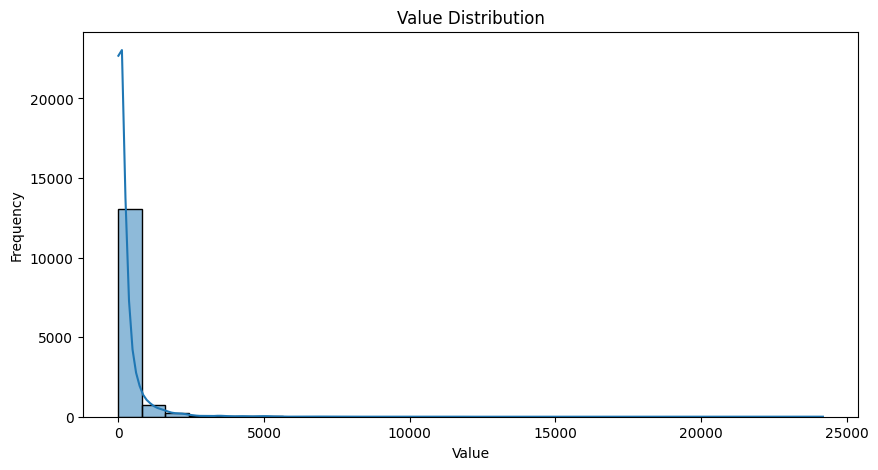

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of QTY
plt.figure(figsize=(10, 5))
sns.histplot(data['QTY'], bins=30, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of VALUE
plt.figure(figsize=(10, 5))
sns.histplot(data['VALUE'], bins=30, kde=True)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

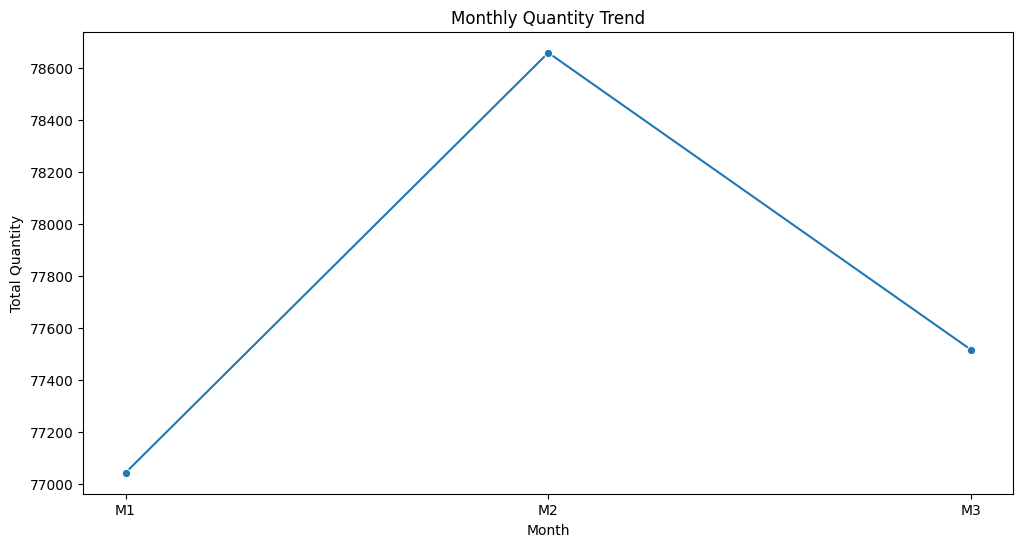

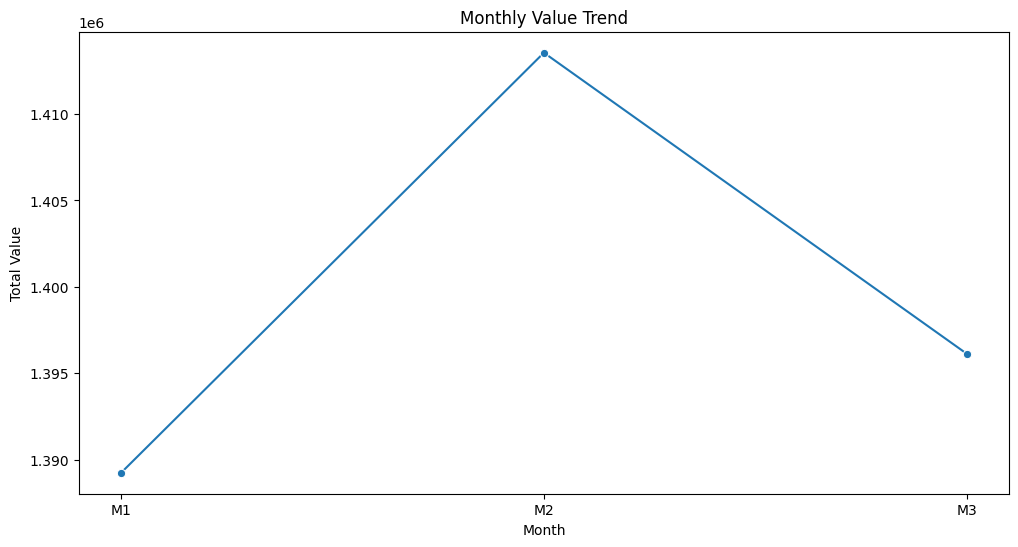

In [ ]:
# Aggregate data by month
monthly_sales = data.groupby('MONTH').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot monthly quantity trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MONTH', y='QTY', marker='o')
plt.title('Monthly Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.show()

# Plot monthly value trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MONTH', y='VALUE', marker='o')
plt.title('Monthly Value Trend')
plt.xlabel('Month')
plt.ylabel('Total Value')
plt.show()


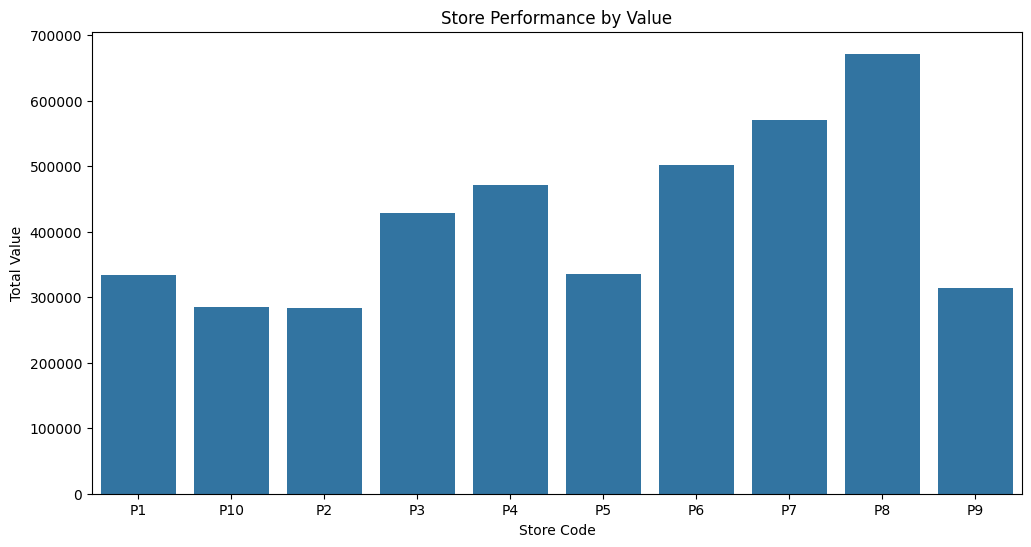

In [ ]:
# Aggregate data by store
store_performance = data.groupby('STORECODE').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot store performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=store_performance, x='STORECODE', y='VALUE')
plt.title('Store Performance by Value')
plt.xlabel('Store Code')
plt.ylabel('Total Value')
plt.show()

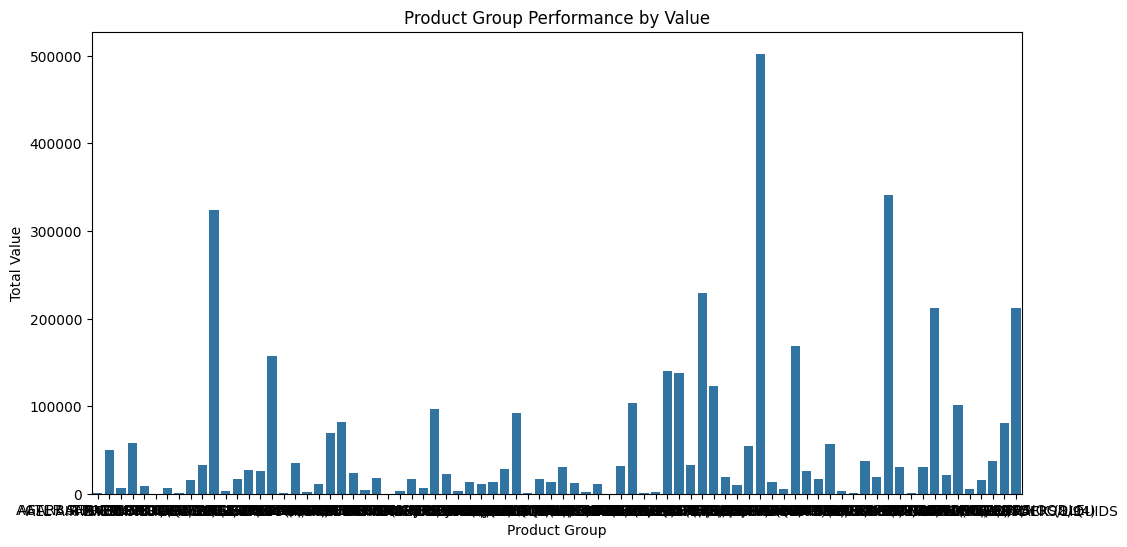

In [ ]:
# Aggregate data by product group
grp_performance = data.groupby('GRP').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot product group performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=grp_performance, x='GRP', y='VALUE')
plt.title('Product Group Performance by Value')
plt.xlabel('Product Group')
plt.ylabel('Total Value')
plt.show()

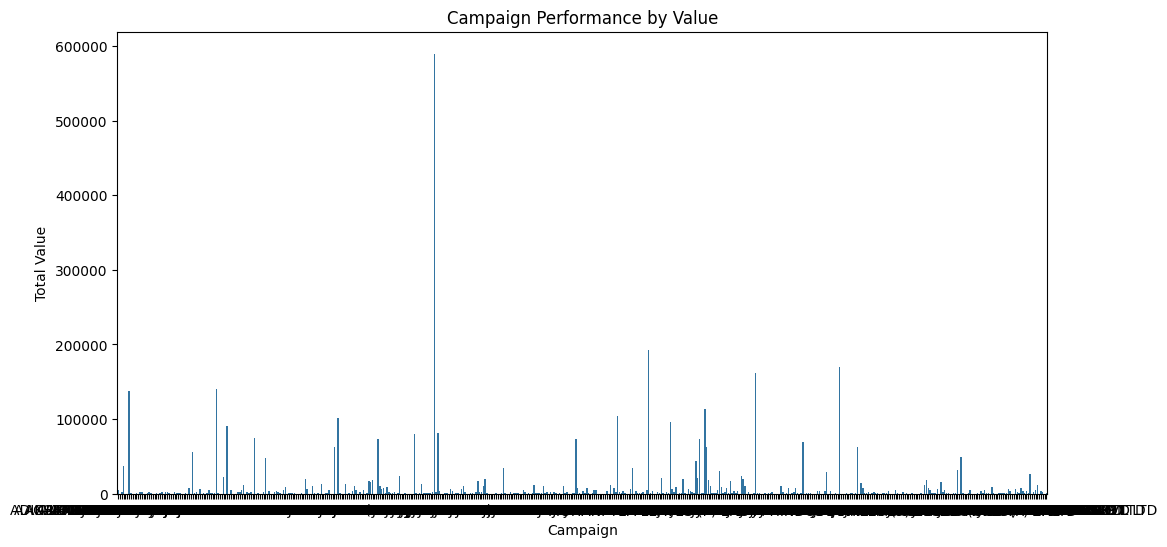

In [ ]:
# Aggregate data by campaign
cmp_performance = data.groupby('CMP').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot campaign performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=cmp_performance, x='CMP', y='VALUE')
plt.title('Campaign Performance by Value')
plt.xlabel('Campaign')
plt.ylabel('Total Value')
plt.show()

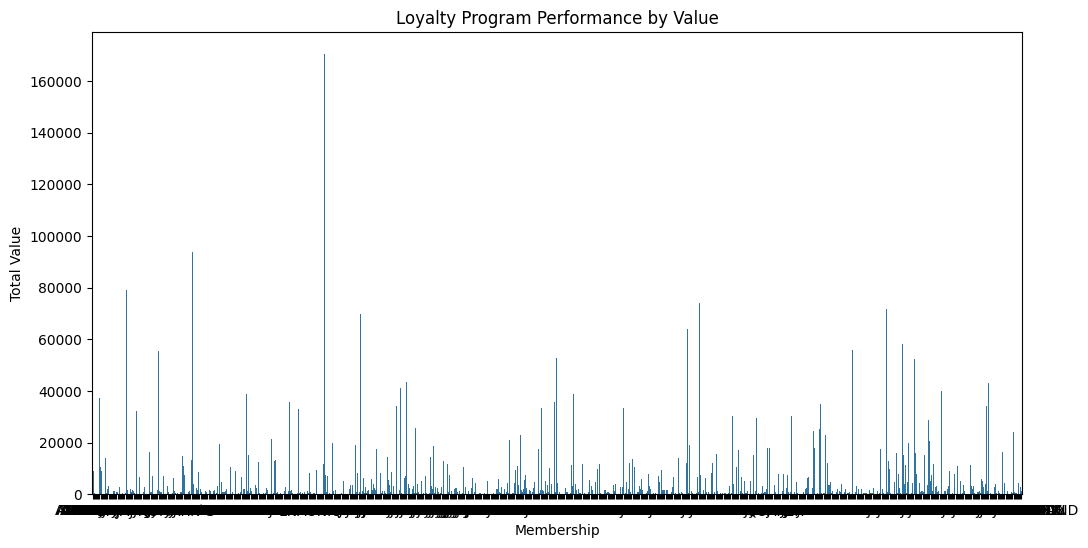

In [ ]:
# Aggregate data by membership
mbrd_performance = data.groupby('MBRD').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot loyalty program performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=mbrd_performance, x='MBRD', y='VALUE')
plt.title('Loyalty Program Performance by Value')
plt.xlabel('Membership')
plt.ylabel('Total Value')
plt.show()


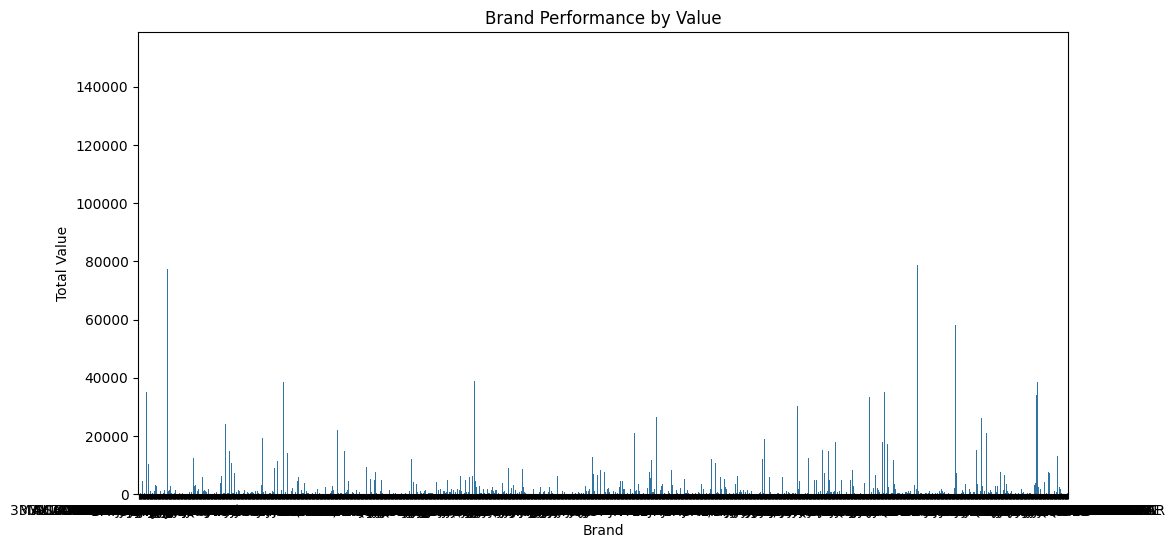

In [ ]:
# Aggregate data by brand
brd_performance = data.groupby('BRD').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot brand performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=brd_performance, x='BRD', y='VALUE')
plt.title('Brand Performance by Value')
plt.xlabel('Brand')
plt.ylabel('Total Value')
plt.show()


In [ ]:
# Overall Sales Trends
monthly_sales_summary = monthly_sales.describe()
print("Monthly Sales Summary:")
print(monthly_sales_summary)

# Store Performance Summary
store_performance_summary = store_performance.describe()
print("\nStore Performance Summary:")
print(store_performance_summary)

# Product Group Performance Summary
grp_performance_summary = grp_performance.describe()
print("\nProduct Group Performance Summary:")
print(grp_performance_summary)

# Campaign Performance Summary
cmp_performance_summary = cmp_performance.describe()
print("\nCampaign Performance Summary:")
print(cmp_performance_summary)

# Customer Segmentation Summary
mbrd_performance_summary = mbrd_performance.describe()
print("\nCustomer Segmentation Summary:")
print(mbrd_performance_summary)

# Brand Performance Summary
brd_performance_summary = brd_performance.describe()
print("\nBrand Performance Summary:")
print(brd_performance_summary)


Monthly Sales Summary:
                QTY         VALUE
count      3.000000  3.000000e+00
mean   77738.333333  1.399644e+06
std      830.826296  1.251477e+04
min    77042.000000  1.389256e+06
25%    77278.500000  1.392698e+06
50%    77515.000000  1.396139e+06
75%    78086.500000  1.404838e+06
max    78658.000000  1.413538e+06

Store Performance Summary:
                QTY          VALUE
count     10.000000      10.000000
mean   23321.500000  419893.300000
std     6862.919289  132596.228673
min    10483.000000  284024.000000
25%    20956.500000  318747.000000
50%    21250.500000  381818.000000
75%    27199.750000  494861.750000
max    34089.000000  671988.000000

Product Group Performance Summary:
                QTY          VALUE
count     80.000000      80.000000
mean    2915.187500   52486.662500
std     6044.118482   86481.628002
min        1.000000      22.000000
25%      181.750000    6320.750000
50%      888.000000   18291.500000
75%     2671.000000   55354.500000
max    35375

In [ ]:
# Insights on High-Performing Stores
high_performing_stores = store_performance.sort_values(by='VALUE', ascending=False).head()
print("Top 5 High-Performing Stores by Value:")
print(high_performing_stores)

Top 5 High-Performing Stores by Value:
  STORECODE    QTY   VALUE
8        P8  32003  671988
7        P7  21114  571136
6        P6  21178  502627
4        P4  34089  471566
3        P3  27602  428550


In [ ]:
# Insights on Popular Product Categories
popular_product_groups = grp_performance.sort_values(by='VALUE', ascending=False).head()
print("\nTop 5 Popular Product Groups by Value:")
print(popular_product_groups)


Top 5 Popular Product Groups by Value:
                              GRP    QTY   VALUE
57  REFINED EDIBLE OILS-ALL PACKS   3108  502344
68                 SPICES (03/04)  25179  341116
10     BISCUITS - CORE & NON CORE  35375  324360
52                   PACKAGED TEA   7225  229186
72           TOILET SOAPS (04/00)   7298  212570


In [ ]:
# Insights on Campaign Success
successful_campaigns = cmp_performance.sort_values(by='VALUE', ascending=False).head()
print("\nTop 5 Successful Campaigns by Value:")
print(successful_campaigns)


Top 5 Successful Campaigns by Value:
                            CMP    QTY   VALUE
174  HINDUSTAN UNILEVER LIMITED  46584  589463
292      MONDELEZ INTERNATIONAL  12769  192167
397            S NARENDRA KUMAR  11510  169364
351            PROCTER & GAMBLE  10399  161658
54               BRITANNIA INDS  13211  139910


In [ ]:
# Insights on Customer Segmentation
loyalty_program_performance = mbrd_performance.sort_values(by='VALUE', ascending=False)
print("\nLoyalty Program Performance:")
print(loyalty_program_performance)


Loyalty Program Performance:
                      MBRD    QTY   VALUE
204                EVEREST  11528  170465
222                FORTUNE    693  116291
88      CADBURY DAIRY MILK   4236   93947
675                SOCIETY   3838   80805
30                    AMUL    784   79010
..                     ...    ...     ...
202              EVER YUTH      0       0
777                   VASU     30       0
120                 CIMTON      0       0
338  JOHNSON'S BABY-LOTION      0       0
188                   DYNA      0       0

[818 rows x 3 columns]


In [ ]:
# Insights on Brand Performance
top_performing_brands = brd_performance.sort_values(by='VALUE', ascending=False).head()
print("\nTop 5 Performing Brands by Value:")
print(top_performing_brands)


Top 5 Performing Brands by Value:
               BRD    QTY   VALUE
405        EVEREST  10888  151185
469        FORTUNE    611  100703
1351  SOCIETY LEAF   3729   78664
50            AMUL    765   77265
1388        SUNDAY    463   71626


In [ ]:
# Recommendations based on insights

# 1. Improve Stock for High-Performing Stores
print("\nRecommendation 1: Improve Stock for High-Performing Stores")
print("Focus on maintaining sufficient inventory levels at top-performing stores to avoid stockouts and maximize sales opportunities.")


Recommendation 1: Improve Stock for High-Performing Stores
Focus on maintaining sufficient inventory levels at top-performing stores to avoid stockouts and maximize sales opportunities.


In [ ]:
# 2. Focus on Popular Product Categories
print("\nRecommendation 2: Focus on Popular Product Categories")
print("Increase marketing efforts and stock levels for top product categories to meet customer demand and drive sales growth.")



Recommendation 2: Focus on Popular Product Categories
Increase marketing efforts and stock levels for top product categories to meet customer demand and drive sales growth.


In [ ]:
# 3. Enhance Campaign Strategies
print("\nRecommendation 3: Enhance Campaign Strategies")
print("Analyze the characteristics of successful campaigns and replicate these strategies for future promotions to boost sales.")


Recommendation 3: Enhance Campaign Strategies
Analyze the characteristics of successful campaigns and replicate these strategies for future promotions to boost sales.


In [ ]:
# 5. Promote Top-Performing Brands
print("\nRecommendation 5: Promote Top-Performing Brands")
print("Partner with top-performing brands for joint promotions and highlight these brands in marketing materials to attract more customers.")


Recommendation 5: Promote Top-Performing Brands
Partner with top-performing brands for joint promotions and highlight these brands in marketing materials to attract more customers.


In [ ]:
# 4. Leverage Loyalty Programs
print("\nRecommendation 4: Leverage Loyalty Programs")
print("Encourage customer sign-ups for loyalty programs by offering exclusive benefits, which can help increase customer retention and repeat purchases.")


Recommendation 4: Leverage Loyalty Programs
Encourage customer sign-ups for loyalty programs by offering exclusive benefits, which can help increase customer retention and repeat purchases.
